In [1]:
import torch
from gym_chess_env import ChessBoard_gym
from agent_chess_pytorch import DQN
import numpy as np
import math
import chess
import chess.svg
from svglib.svglib import svg2rlg
import cv2
from reportlab.graphics import renderPM
from PIL import Image
import re
import glob
import PIL
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: pnarsina (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.11.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade





br1 - BL - BL - BL - BL - BL - BL - br2 -  

BL - BL - BL - BL - BL - BL - BL - BL -  

BL - BL - BL - BL - BL - BL - BL - BL -  

BL - BL - BL - BL - BL - BL - BL - BL -  

BL - BL - BL - BL - BL - BL - BL - BL -  

BL - BL - BL - BL - BL - BL - BL - BL -  

BL - BL - BL - BL - BL - BL - BL - BL -  

wr1 - BL - BL - BL - BL - BL - BL - wr2 -  






In [2]:
def fen_to_image(fen):
    board = chess.Board(fen)
    current_board = chess.svg.board(board=board)

    output_file = open('current_board.svg', "w")
    output_file.write(current_board)
    output_file.close()

    svg = svg2rlg('current_board.svg')
    renderPM.drawToFile(svg, 'current_board.png', fmt="PNG")
    return board

In [3]:
def load_from_saved_model(model,  path = "checkpoint.pth.tar"):
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['state_dict'])
    return(model)

In [12]:
env = ChessBoard_gym()
state = torch.from_numpy(env.reset()).float()
starting_pos_FEN = env.get_FEN()
# FEN_string = 'rnbqk1nr/pppppppp/8/2b5/8/8/PPPPPPPP/RNBQKBNR'
board = fen_to_image(starting_pos_FEN)
board_image = cv2.imread('current_board.png')

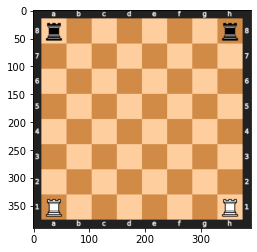

In [16]:
image = mpimg.imread('current_board.png')
plt.show()
plt.imshow(image)

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DQN(8,8,112).to(device)
# model = load_from_saved_model(model,"checkpoint_allrooks_1200ep.pth.tar")
model = load_from_saved_model(model,"checkpoint.pth-4rook_best-adamw.tar")

In [18]:
observation_space = 64
state_model_input = torch.reshape(state, [1, observation_space])


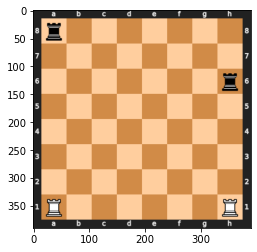

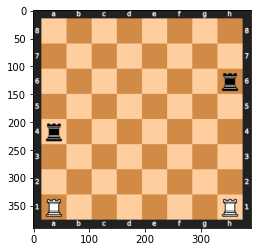

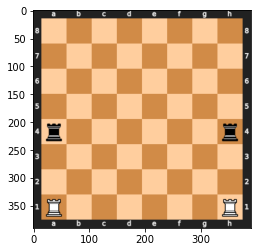

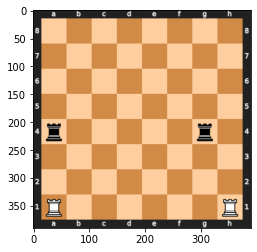

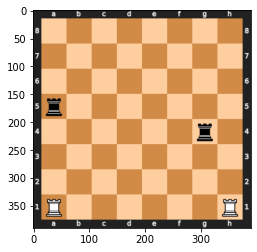

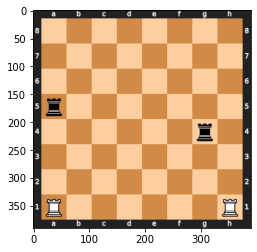

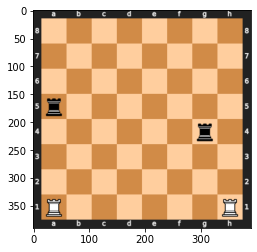

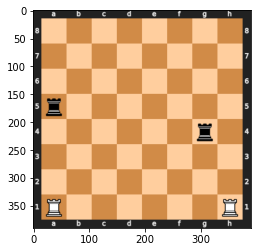

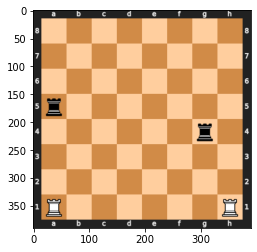

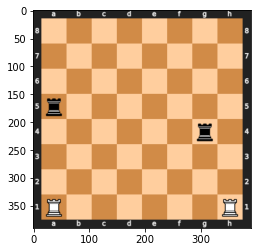

In [19]:
action_id = model(state_model_input).argmax(1)[0].detach()
for i in range(0,10):
    
    next_state,reward, _, _  = env.step(action_id)
#     print("Next state: ", next_state,  "reward: ", reward, " action id:", action_id, "action details: ",env.complete_actions_list[action_id] )
    next_pos_FEN = env.get_FEN()
    board = fen_to_image(next_pos_FEN)
    next_state_model_input = torch.from_numpy(next_state).float()
    next_state_model_input = torch.reshape(next_state_model_input, [1, observation_space])
    actions_list = model(next_state_model_input)
#     print("actions list", actions_list)
    action_id = actions_list.argmax(1)[0].detach()
    action_details = env.complete_actions_list[action_id]
#     print("sorted acitons: ", sorted(actions_list.detach()[0]))
    if np.where(env.chess_board == action_details[0])[0].size ==0:
        action_id = sorted(actions_list.detach()[0])[-2]
        action_details = env.complete_actions_list[action_id]
        print('second choice action details: ', action_details)
    board_image = cv2.imread('current_board.png')
    image = mpimg.imread('current_board.png')
    plt.show()
    plt.imshow(image)